#__Title:__ COGS 108  Final Project - Kickstarter Success

#__Overview:__

We are interested in looking at the correlation between the success rate of kickstarter technology, design, game companies in the United States and the U.S. stock market (NASDAQ, NYSE, and AMEX). By looking at that relationship, we are wondering if we can predict whether the kickstarter company can be successful in the next three years. We can use past stock prices to predict what type of industries and companies would be successful in the future and we can look at the old kickstarter companies to find the probability of investors getting their money back in the same industries. With these, we can see if a pattern exists and use it to predict the success rate of future kickstarters. 


#__Names:__

*   Mandy Wu
*   Cydney Chung
*   Taeho Yum 
*   Tae Kwang (Jason) Chung
*   Yong Hoon Do



#__Research Questions:__
Is it possible to predict the success rate of Kickstarter technology, design, and games companies in the United States from 2017-2019? If so, how accurate will it be?

Based on the U.S. stock trends and investor’s probability of getting their money back, does Kickstarter companies success rates reflect consumer demands?


#__Background and Prior Work:__ 

It would be interesting to see what type of companies would be more popular in the long run and how consumer products would change. From the success of certain companies, we can predict what type of companies will affect our lives in the future. On the other hand, the stock market fluctuates depending on demand and taking that into account, we hypothesized that the Kickstarter success will also depend on the demand and will fit into the same trends as the stock market. We decided to examine Kickstarter companies because they serve as an initial platform for popular products. Kickstarter is one of the famous crowdfunding platforms focused on creativity. The company's mission is to help bring creative projects to life. Projects can include anything from music to technology. It allows project owners to crowdfund for their idea or prototype products. The projects are supported by people called backers who pledge money to fund the product. The process for Kickstarter is all-or-nothing, so if the funding goal is not reached by the deadline, the project fails and backers get their money back. One example of the successful companies backed by Kickstarter is Pebble watch. This product is the most funded project in Kickstarter history, at the time. The NASDAQ, NYSE, and AMEX are stock markets predominantly in the U.S. where people exchange stocks and can check stock prices. NASDAQ is an American exchange that is completely online and tends to lean towards technology companies. NYSE is the largest U.S. stock exchange in volume and has the strictest requirements of the three markets that we are looking at. NYSE also has a physical trading floor where people can exchange stocks. AMEX is similar to NYSE but they are on a smaller scale with less strict requirements and listings. AMEX also traded exchange-traded funds, mutual funds and stocks alongside one another. 

Some prior works relating to our projects are another COGS 108 project on Kickstarter. They focused on the different states that Kickstarter has: Successful, Failed, Canceled, and Suspended. Their project was geared toward analysis while ours is more geared towards predicting the success and failure rate in Kickstarter. Another project was done by Adebola Lamidi on predicting the success rate of Kickstarter campaigns. His project focuses on all of the Kickstarter companies from 2009-2011. This is different from our project because we are only focusing on certain types of company categories (technology, design, and game) and we are using different features such as stock trends and pledged amounts to help us predict the success rate of Kickstarter companies. 




References:

https://github.com/COGS108/FinalProjects-Sp19/blob/master/FinalProject_Group102.ipynb

https://towardsdatascience.com/predicting-the-success-of-kickstarter-campaigns-3f4a976419b9



# __Hypothesis:__

Yes, we think we are able to predict the success of Kickstarter companies. We do not believe that there will be a high accuracy due to confounding variables that could influence the different factors and their relationship. We do think that the success of the Kickstarter companies would reflect the consumer demands. 


#__Datasets:__

*Dataset name:* Kickstarter Datasets

*Link:* https://webrobots.io/kickstarter-datasets/

*Number of observations:* 7,200,000+

*Features and Explanation:* There are 37 features and we chose to use
backers_count, category, country, created_at, deadline, goal, state, 
state_changed_at, usd_pledged. We chose these so we could further wrangle the 
data into a workable size and that would be relevant in our analysis. These 
features will help us determine when the companies were in operation, where, 
how much money that they had asked for in order to succeed, how many people 
were interested and supported the company and how much money that they had 
actually acquired to work on their products. These are important to our 
analysis because we want to find a trend over time based off of the backers, 
pledges, and goals and see how that would coincide with the data from the stock
markets.

Dataset name: US historical stock prices with earnings data: 20 years of
NASDAQ, NYSE, and AMEX daily stock prices

Link:https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data#stock_prices_latest.csv

Number of observations: 21,180,000+

Features and Explanation: There are 9 features and we choose symbol, date,
close_adjusted, and volume. These features will help us determine the price and
volume of the companies at a certain date. We can use this information to 
construct a price trend for the companies and see a pattern of change 
throughout the years. 

Other sources used:

API: https://financialmodelingprep.com/api/v3/company/profile/{symbol}

Explanation: This API was used to find the category and name of the companies
from the stock market to match with the symbol given in the US historical 
stock prices with earnings data: 20 years of NASDAQ, NYSE, and AMEX daily 
stock prices dataset. We need the category of these companies because we have 
to match certain types of Kickstarter companies to these categories in the 
stock market.  

#__Setup:__

In [0]:
import pandas as pd
import numpy as np

# plotting tools
import seaborn as sns
import matplotlib.pyplot as plt

# for k-fold validation
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#__Data Cleaning:__

For the U.S. stock market data, we narrowed down from 9 features to 4. We only
used stock data from 2017-2019. For the Kickstarter data, we also used data 
from 2017-2019 and we took out unnecessary columns that were not needed for 
analysis. There are a total of 37 features and we narrowed it down to the 
features that we need for our models. In the end, we kept backers_count, 
category, country, created_a, deadline, state_changed_at, goal, usd_pledge, 
state. Since we are only focusing on the United States Kickstarter companies 
and only certain categories of industries, we drop the unnecessary rows from 
our data. 


In [0]:
def clean_stock_dataset():
  import pandas as pd
  import os
  import zipfile
  import requests
  from bs4 import BeautifulSoup

  def fetch_company_info(symbol):
      url = lambda x: 'https://financialmodelingprep.com/api/v3/company/profile/' + x
      res = requests.get(url(symbol)).json()
      if 'profile' not in res or 'industry' not in res['profile'] or 'companyName' not in res['profile']:
          return (symbol, '', '')
      industry = res['profile']['industry']
      name = res['profile']['companyName']
      return (symbol, name, industry)

  def build_stocks_dict(df):
      unique_symbols = df.symbol.unique()
      res = dict()
      for symbol in unique_symbols:
          cinfo = fetch_company_info(symbol)
          if not cinfo:
              continue
          res[symbol] = cinfo
      return res


  print('reading stocks..')
  df = pd.read_csv('stocks.csv')

  print('fetching stock data from the API..')
  infos = build_stocks_dict(df)

  def get_industry(symbol):
      if symbol not in infos:
          return ''
      return infos[symbol][2]

  def get_company_name(symbol):
      if symbol not in infos:
          return ''
      return infos[symbol][1]

  print('creating new columns..')
  df['company_name'] = df['symbol'].apply(get_company_name)
  df['industry'] = df['symbol'].apply(get_industry)
  print(df.head())

  print('writing newstocks.csv')
  df.to_csv('newstocks.csv')
  print('done')

def average_category_stock_increase():
  from tqdm import tqdm


  f = open('newstocks.csv', 'r')
  lines = f.readlines()

  stockD = {}
  print('Reading CSV File...')
  header = True

  for line in tqdm(lines):
    # line = [date, symbol, close_adjusted, volume, company_name, primary_category]
    if header:
      header = False
      continue
    line = line.strip('\n').split(',')
    if line[1] not in stockD:
      stockD[line[1]] = [line[2], line[2], line[-1]]
    else:
      start_val = stockD[line[1]][0]
      category = stockD[line[1]][2]
      stockD[line[1]] = [start_val, line[2], category]
  f.close()

  tech_trend = [0.0, 0]
  design_trend = [0.0, 0]
  game_trend = [0.0, 0]

  for key in stockD.keys():
    start_val = float(stockD[key][0])
    end_val = float(stockD[key][1])
    category = stockD[key][2]
    val_change = (end_val - start_val) / start_val
    if category == 'technology':
      val = tech_trend[0]
      num = tech_trend[1]
      tech_trend = [val + val_change, num + 1]
    elif category == 'design':
      val = design_trend[0]
      num = design_trend[1]
      design_trend = [val + val_change, num + 1]
    elif category == 'game':
      val = game_trend[0]
      num = game_trend[1]
      game_trend = [val + val_change, num + 1]

  print('Stech =', tech_trend[0] / tech_trend[1])
  print('Sdesign =', design_trend[0] / design_trend[1])
  print('Sgame =', game_trend[0] / game_trend[1])

  print('Number of tech companies =', tech_trend[1])
  print('Number of design companies =', design_trend[1])
  print('Number of game companies =', game_trend[1])

In [0]:
def download_and_clean_kickstarter_dataset():
  import pandas as pd
  import os
  import zipfile
  import wget
  import urllib
  import requests
  from bs4 import BeautifulSoup
  import json


  def extract_primary_category(category):
      slug = json.loads(category)['slug'].split('/')
      if len(slug) < 1:
          return None
      return slug[0]

  def extract_secondary_category(category):
      slug = json.loads(category)['slug'].split('/')
      if len(slug) < 2:
          return None
      return slug[1]

  def filter_raw_csv(raw_file_name, result_file_name):
      df = pd.read_csv(raw_file_name)
      columns = ['backers_count', 'category', 'country', 'created_at', 'deadline', 'goal', 'state', 'state_changed_at', 'usd_pledged']
      df = df[columns]
      df = df[df.country == 'US']
      df = df.drop(columns=['country'])
      df = df[df.category.str.contains("technology") | df.category.str.contains("design") | df.category.str.contains("game")]
      df['primary_category'] = df['category'].apply(extract_primary_category)
      df['secondary_category'] = df['category'].apply(extract_secondary_category)
      df = df.drop(columns=['category'])
      df = df[(df.state == 'failed') | (df.state == 'successful')]
      df.to_csv(result_file_name, mode='a', index=False, header=None)

  def add_header(result_file_name):
      f = open(result_file_name, 'r')
      temp = f.read()
      f.close()
      f = open(result_file_name, 'w')
      f.write("backers_count,category,created_at,deadline,goal,state,state_changed_at,usd_pledged\n")
      f.write(temp)
      f.close()


  # Download all the csv files as zip per month
  page = requests.get('https://webrobots.io/kickstarter-datasets/')
  soup = BeautifulSoup(page.text, features='html.parser')
  table = soup.findAll('div', class_='fusion-text')[0]

  links = list()
  for href in table.findAll('a'):
      link = href['href']
      if 'zip' in link:
          links.append((href['href'], link.split("/")[-1]))

  for link, filename in links[0:38]:
      wget.download(link)



  # Move all .zip files to zips/ folder
  # Unzip all the zip files and store the raw data into datas/
  # Filter out unnecessary data and store the final result to results/
  zip_name = 'zips/'
  results_dir = 'results/result'

  os.system('mkdir zips datas results')
  os.system('mv *.zip zips')
  os.system('rm -rf datas/*')
  os.system('rm -rf results/*')

  for z in os.listdir(zip_name):
      s = ''.join(filter(lambda i : i.isdigit(), z))
      s = s[0:8]
      with zipfile.ZipFile(zip_name + z, 'r') as zip_ref:
          dir_name = 'datas/data' + s
          result_file_name = results_dir + s + '.csv'
          zip_ref.extractall(dir_name)
          for f in os.listdir(dir_name):
              filter_raw_csv(dir_name + '/' + f, result_file_name)
          add_header(result_file_name)



  # Merge result csv files by year
  target_year = [2017, 2018, 2019, 2020]
  for f in os.listdir('results/'):
      num = ''.join(filter(lambda i : i.isdigit(), f))
      year = num[0:4]
      if int(year) in target_year:
          resFile = open('results/' + f, 'r')
          data = resFile.read().splitlines(True)
          resFile.close()
          resFile = open(results_dir + year + '.csv', 'a')
          resFile.writelines(data[1:])
  for year in target_year:
      fin_res_file = results_dir + str(year) + '.csv'
      add_header(fin_res_file)

#__Data Analysis and Results:__

# **Descriptive Analysis**

In [0]:
#Read data
ks2017 = pd.read_csv('result2017.csv')
ks2018 = pd.read_csv('result2018.csv')
ks2019 = pd.read_csv('result2019.csv')

#merge all 3years
kickstarter = pd.concat([ks2017,ks2018,ks2019])

#get rid of unwanted states
mask = (kickstarter["state"] == "successful") | (kickstarter["state"] == "failed")
kickstarter = kickstarter.loc[mask]

#split dataset into categories
mask = kickstarter['primary_category']=="technology"
ks_tech = kickstarter.loc[mask]

mask = kickstarter['primary_category']=="games"
ks_games = kickstarter.loc[mask]

mask = kickstarter['primary_category']=="design"
ks_design = kickstarter.loc[mask]

In [0]:
#set theme
sns.set(style="darkgrid")


In [0]:
kickstarter.describe()

,backers_count,created_at,deadline,goal,state_changed_at,usd_pledged
count,931677.000000,9.316770e+05,9.316770e+05,9.316770e+05,9.316770e+05,9.316770e+05
mean,469.411314,1.426900e+09,1.434817e+09,5.843645e+04,1.434817e+09,4.376040e+04
std,2374.816340,6.403713e+07,6.407349e+07,1.122819e+06,6.407364e+07,2.329506e+05
min,0.000000,1.240638e+09,1.243872e+09,1.000000e+00,1.243872e+09,0.000000e+00
25%,5.000000,1.382314e+09,1.392968e+09,3.000000e+03,1.392968e+09,1.720000e+02
50%,50.000000,1.425356e+09,1.432306e+09,1.000000e+04,1.432306e+09,3.328000e+03
75%,269.000000,1.470755e+09,1.478794e+09,3.000000e+04,1.478794e+09,2.029800e+04
max,219382.000000,1.574781e+09,1.576120e+09,1.000000e+08,1.576120e+09,2.033899e+07


This summarizes our overall Kickstarter data set and includes all the industries together. The columns that we focused on were backers_count, goal, and usd_pledge. The backers_count averaged at ~470 backers. The average amount for goal was higher than the usd_pledge that was received. The goal is higher on average than the pledge amount so companies ask for money than the amount that they were given. 

In [0]:
ks_tech.describe()

,backers_count,created_at,deadline,goal,state_changed_at,usd_pledged
count,446926.000000,4.469260e+05,4.469260e+05,4.469260e+05,4.469260e+05,4.469260e+05
mean,329.508252,1.433542e+09,1.441749e+09,7.530793e+04,1.441750e+09,4.397509e+04
std,1734.476196,5.420911e+07,5.391720e+07,1.123149e+06,5.391766e+07,1.997631e+05
min,0.000000,1.240638e+09,1.243872e+09,1.000000e+00,1.243872e+09,0.000000e+00
25%,3.000000,1.405023e+09,1.411928e+09,5.000000e+03,1.411928e+09,5.100000e+01
50%,20.000000,1.430626e+09,1.437782e+09,1.500000e+04,1.437782e+09,1.529000e+03
75%,147.000000,1.469541e+09,1.478111e+09,5.000000e+04,1.478111e+09,1.741300e+04
max,105857.000000,1.574550e+09,1.576092e+09,1.000000e+08,1.576092e+09,7.850867e+06


This chart summarizes only the technology companies within the Kickstarter data. The number of backers averaged ~330 and the pattern of the average goal being higher than the usd_pledge continues in this section. The goal average is a lot larger than the pledge average.

In [0]:
ks_games.describe()

,backers_count,created_at,deadline,goal,state_changed_at,usd_pledged
count,301679.000000,3.016790e+05,3.016790e+05,3.016790e+05,3.016790e+05,3.016790e+05
mean,680.439338,1.424575e+09,1.432156e+09,4.044546e+04,1.432156e+09,4.271609e+04
std,3251.014660,6.992331e+07,6.999479e+07,1.105591e+06,6.999478e+07,2.453793e+05
min,0.000000,1.240998e+09,1.245043e+09,1.000000e+00,1.245043e+09,0.000000e+00
25%,14.000000,1.366678e+09,1.375073e+09,2.000000e+03,1.375073e+09,5.200000e+02
50%,107.000000,1.421877e+09,1.428950e+09,6.500000e+03,1.428950e+09,5.000000e+03
75%,402.000000,1.474293e+09,1.481060e+09,1.650000e+04,1.481060e+09,1.922701e+04
max,219382.000000,1.574781e+09,1.576107e+09,1.000000e+08,1.576107e+09,1.239314e+07


This chart summarizes only the games companies within the Kickstarter data. The number of backers averaged ~680. The average goal was lower than the usd_pledge.

In [0]:
ks_design.describe()

,backers_count,created_at,deadline,goal,state_changed_at,usd_pledged
count,183072.000000,1.830720e+05,1.830720e+05,1.830720e+05,1.830720e+05,1.830720e+05
mean,463.203882,1.414516e+09,1.422280e+09,4.689564e+04,1.422280e+09,4.495720e+04
std,1954.349600,7.327004e+07,7.373320e+07,1.149273e+06,7.373303e+07,2.820014e+05
min,0.000000,1.241023e+09,1.246726e+09,1.000000e+00,1.246726e+09,0.000000e+00
25%,15.000000,1.356913e+09,1.365812e+09,2.000000e+03,1.365812e+09,6.370000e+02
50%,91.000000,1.404871e+09,1.410822e+09,6.666000e+03,1.410822e+09,6.256000e+03
75%,335.000000,1.466716e+09,1.475264e+09,1.750000e+04,1.475264e+09,2.683700e+04
max,154926.000000,1.574464e+09,1.576120e+09,8.000000e+07,1.576120e+09,2.033899e+07


This chart summarizes only the games companies within the Kickstarter data. The number of backers averaged ~460. The average goal was higher than the usd_pledge. 

**things to notice**

**- mean goal :** tech>design>games

**- mean backers count:** games>design>tech

**- mean usd_pledged :** design>tech>games

Although the overall design has the highest average pledge amount, the pledge average of games was higher than its own goal average. This is different from design and technology because their goal amount was higher than their pledge amount. Technology had the highest mean goal however it’s pledge amount average was not that high and could explain the successes and failures of the companies under technology. 


Barplot of percentage of categories

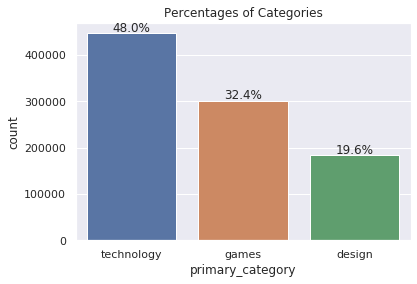

In [0]:
#Distribution of categories
ax = sns.countplot(x='primary_category',data=kickstarter);
plt.title('Percentages of Categories')
total = len(kickstarter['primary_category'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        ax.text(p.get_x()+p.get_width()/2.,p.get_height() + 3000,percentage,ha="center") 
plt.show()

This bar plot shows the percentage of each type of companies in our dataset. We have the largest sample size for technology companies and the smallest sample size for design companies. 


Barplot of State for the whole and each 3 categories

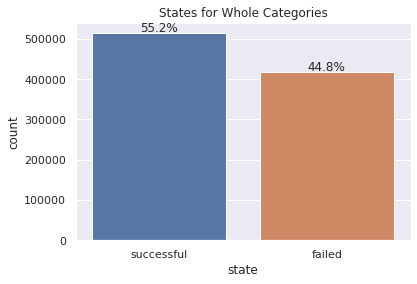

In [0]:
#Distribution of state for whole data
ax = sns.countplot(x='state',order=['successful', 'failed'],data=kickstarter);
plt.title('States for Whole Categories')
total = len(kickstarter['state'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        ax.text(p.get_x()+p.get_width()/2.,p.get_height() + 3000,percentage,ha="center") 
plt.show()

Overall, Kickstarter companies in our dataset are more likely to be successful. 55.2% of the companies in our data succeeded and 44.8% of the companies failed.

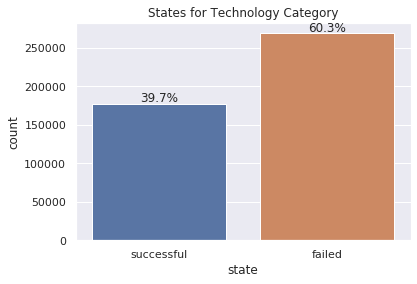

In [0]:
#Distribution of state for tech
ax = sns.countplot(x='state',order=['successful', 'failed'],data=ks_tech);
plt.title('States for Technology Category')
total = len(ks_tech['state'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        ax.text(p.get_x()+p.get_width()/2.,p.get_height() + 2000,percentage,ha="center") 
plt.show()

39.7% of the technology companies succeeded and 60.3% of them failed.


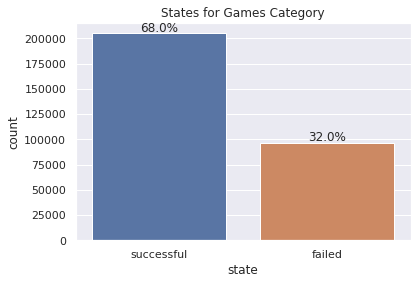

In [0]:
#Distribution of state for games
ax =sns.countplot(x='state',data=ks_games);
plt.title('States for Games Category')
total = len(ks_games['state'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        ax.text(p.get_x()+p.get_width()/2.,p.get_height() + 2000,percentage,ha="center") 
plt.show()

68% of the games companies succeeded and 32% of them failed.


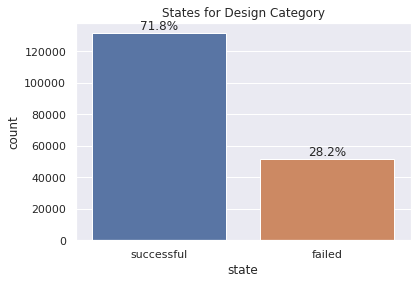

In [0]:
#Distribution of state for design
ax=sns.countplot(x='state',data=ks_design);
plt.title('States for Design Category')
total = len(ks_design['state'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        ax.text(p.get_x()+p.get_width()/2.,p.get_height() + 2000,percentage,ha="center") 
plt.show()

71.8% of the design companies succeeded and 28.2% of them failed.

For these barplot visualizations, we can infer the probability of success and failure for each of the categories. For technology, the percentage of success was less than percentage of failure. For games and design, the percentage of companies that were considered successful was a lot higher than the ones that failed. Based on the visualizations, we can learn that in game and design categories, more companies succeeded than failed, while in technology category more companies failed than succeeded. 

**Boxplots of Number of Backers for Each 3 Categories**

We used boxplots to visualize the distribution of number of backers, pledged amount, and goal amount in each state from different categories. This will help investigate the features of successful companies and failed companies.

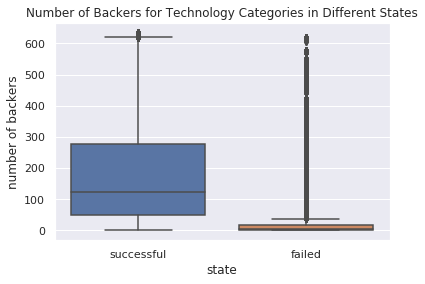

In [0]:
#Reduce the data to 90% quantile to remove outliers
sm = ks_tech["backers_count"].quantile(.90)
tech_small = ks_tech[ks_tech['backers_count']<sm]

#Boxplot of number of backers for tech category, reduced.
ax = sns.boxplot(x=tech_small["state"],y=tech_small["backers_count"],order=['successful', 'failed'])
plt.title('Number of Backers for Technology Categories in Different States')
ax.set(ylabel='number of backers', xlabel='state')
plt.show()

From this plot we can see that in technology category, successful kickstarter companies attracted more number of backers than failed kickstarter companies.


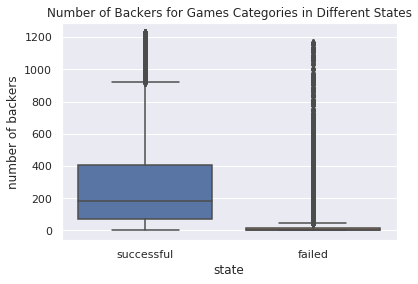

In [0]:
#Reduce the data to 90% quantile to remove outliers
sm = ks_games["backers_count"].quantile(.90)
game_small = ks_games[ks_games['backers_count']<sm]

#Boxplot of number of backers for games category, reduced.
ax = sns.boxplot(x=game_small["state"],y=game_small["backers_count"])
plt.title('Number of Backers for Games Categories in Different States')
ax.set(ylabel='number of backers', xlabel='state')
plt.show()

Similarly, in games category, successful kickstarter companies attracted more number of backers than failed kickstarter companies.


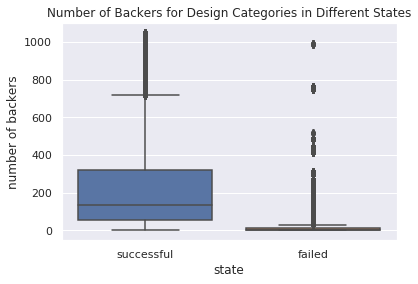

In [0]:
#Reduce the data to 90% quantile to remove outliers
sm = ks_design["backers_count"].quantile(.90)
design_small = ks_design[ks_design['backers_count']<sm]

#Boxplot of number of backers for design category, reduced.
ax = sns.boxplot(x=design_small["state"],y=design_small["backers_count"])
plt.title('Number of Backers for Design Categories in Different States')
ax.set(ylabel='number of backers', xlabel='state')
plt.show()

Similarly in design category, successful kickstarter companies attracted more number of backers than failed kickstarter companies.

It is notable that In all three categories, interquartile range for failed companies stayed near zero while successful companies had about 200. Failed companies mostly couldn't attract any backers while successful companies appealed to hundreds of people. These visualization indicates that kickstarter companies would need enough number of backers in order to succeed

**Boxplots of Pledged Amounts for Each 3 Categories**

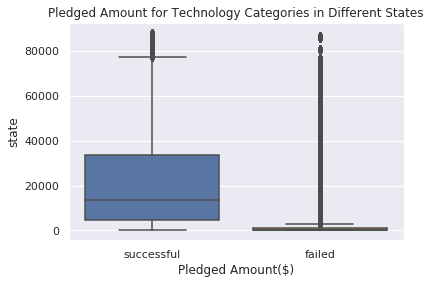

In [0]:
#Reduce the data to 90% quantile to remove outliers
sm = ks_tech["usd_pledged"].quantile(.90)
tech_small = ks_tech[ks_tech['usd_pledged']<sm]

#Boxplot of usd_pledged for tech category, reduced.
ax = sns.boxplot(x=tech_small["state"],y=tech_small["usd_pledged"],order=['successful', 'failed'])
plt.title('Pledged Amount for Technology Categories in Different States')
ax.set(xlabel='Pledged Amount($)', ylabel='state')
plt.show()

From this plot, we can see that in technology category, pledged amounts for successful kickstarters are much greater than those for failed kickstarters.

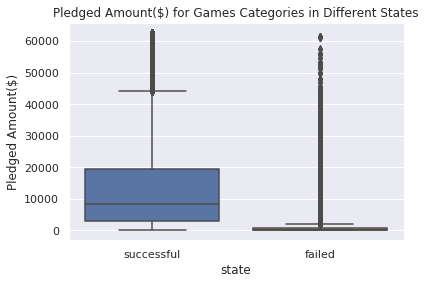

In [0]:
#Reduce the data to 90% quantile to remove outliers
sm = ks_games["usd_pledged"].quantile(.90)
game_small = ks_games[ks_games['usd_pledged']<sm]

#Boxplot of number of backers for games category, reduced.
ax = sns.boxplot(x=game_small["state"],y=game_small["usd_pledged"])
plt.title('Pledged Amount($) for Games Categories in Different States')
ax.set(ylabel='Pledged Amount($)', xlabel='state')
plt.show()

Similarly, we can see that in games category, pledged amounts for successful kickstarters are much greater than those for failed kickstarters. 


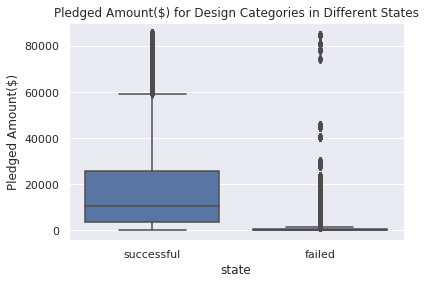

In [0]:
#Reduce the data to 90% quantile to remove outliers
sm = ks_design["usd_pledged"].quantile(.90)
design_small = ks_design[ks_design['usd_pledged']<sm]

#Boxplot of number of backers for games category, reduced.
ax = sns.boxplot(x=design_small["state"],y=design_small["usd_pledged"])
plt.title('Pledged Amount($) for Design Categories in Different States')
ax.set(ylabel='Pledged Amount($)', xlabel='state')
plt.show()

Similarly, we can see that in design category, pledged amounts for successful kickstarters are much greater than those for failed kickstarters. 

From these visualizations we can see that in all three categories, interquartile range for failed companies stayed near zero while successful companies had about 20000. Failed companies mostly did not gain enough money to support their business while successful companies accrued enough money for their project. It hints that greater pledged amount is the key to be a successful kickstarter.


**Boxplot of Goal Amount for Each 3 Categories**

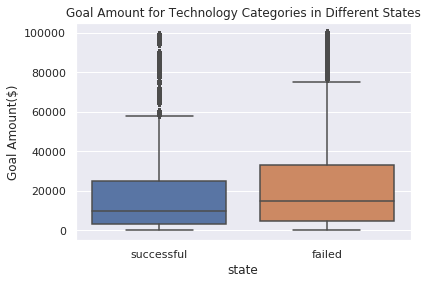

In [0]:
#Reduce the data to 90% quantile to remove outliers
sm = ks_tech["goal"].quantile(.90)
tech_small = ks_tech[ks_tech['goal']<sm]

#Boxplot of goal for tech category, reduced.
ax = sns.boxplot(x=tech_small["state"],y=tech_small["goal"],order=['successful', 'failed'])
plt.title('Goal Amount for Technology Categories in Different States')
ax.set(ylabel='Goal Amount($)', xlabel='state')
plt.show()

From this plot, we can see that in technology category, failed kickstarters tend to have greater goal amount than successful kickstarters did.


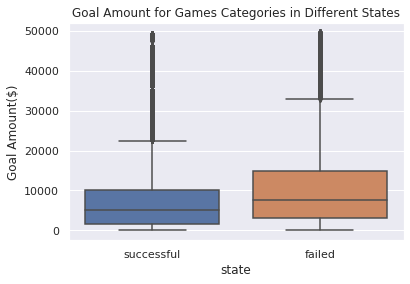

In [0]:
#Reduce the data to 90% quantile to remove outliers
sm = ks_games["goal"].quantile(.90)
game_small = ks_games[ks_games['goal']<sm]

#Boxplot of goal for games category, reduced.
ax = sns.boxplot(x=game_small["state"],y=game_small["goal"])
plt.title('Goal Amount for Games Categories in Different States')
ax.set(ylabel='Goal Amount($)', xlabel='state')
plt.show()

Similarly, we can see that in games category, failed kickstarters tend to have greater goal amount than successful kickstarters did.


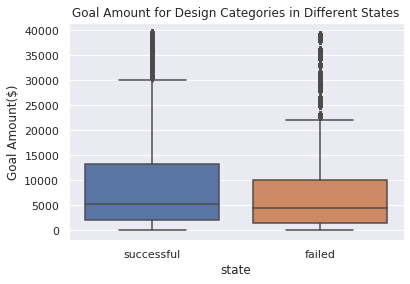

In [0]:
#Reduce the data to 90% quantile to remove outliers
sm = ks_design["goal"].quantile(.90)
design_small = ks_design[ks_design['goal']<sm]


#Boxplot of goal for design category, reduced.
ax = sns.boxplot(x=design_small["state"],y=design_small["goal"])
plt.title('Goal Amount for Design Categories in Different States')
ax.set(ylabel='Goal Amount($)', xlabel='state')
plt.show()

From this plot, we can see that in design category, successful kickstarters tend to have greater goal amount than failed kickstarters did.


It is notable that In technology and games categories, failed companies tend to have larger goal amounts than successful projects did. However, in design category, successful companies tend to have larger goal amounts than failed projects did. Unlike number of backers and pledged amount, the trend of goal amount among state differed from categories.

Overall, from the boxplot, we could infer that in technology and games categories,successful companies tend to have greater number of backers, greater pledged amount, and less goal amount. And in design category while all the other stayed the same, greater goal amount was a tendency for successful companies. Now, we will actually build a model that will predict the state of the company given its category, number of backers, pledged amount, and goal amount. 

# **Modeling Part**

In [0]:
# stocks_df = pd.read_csv('newstocks.csv')
df1 = pd.read_csv('result2017.csv')
df2 = pd.read_csv('result2018.csv')
df3 = pd.read_csv('result2019.csv')
kickstarter_df = pd.concat([df1, df2, df3], ignore_index=True)

In [0]:
kickstarter_df

,backers_count,created_at,deadline,goal,state,state_changed_at,usd_pledged,primary_category,secondary_category
0,29,1433360140,1437939730,10000.0,failed,1437939730,1937.00,technology,gadgets
1,2,1441391288,1444832430,100000.0,failed,1444832432,36.00,technology,gadgets
2,1,1469329044,1470850185,10000.0,failed,1470850185,35.00,technology,gadgets
3,63,1437019307,1440782414,15000.0,failed,1440782414,7375.00,technology,gadgets
4,1,1436193182,1438785180,7500.0,failed,1438785180,25.00,technology,gadgets
...,...,...,...,...,...,...,...,...,...
1031363,1,1435614038,1439519012,40000.0,failed,1439519014,100.00,technology,fabrication tools
1031364,200,1448106944,1454684964,10000.0,successful,1454684964,12505.51,games,puzzles
1031365,5,1526931737,1531033200,68888.0,canceled,1530163837,252.00,games,puzzles
1031366,309,1461959873,1470671965,90000.0,successful,1470671965,109304.00,technology,fabrication tools


In [0]:
future_trend_dict = { 'technology': 25.601547405434047,
                     'design': 0.25960780014819734,
                     'game': -0.08662255731298997 }

kickstarter_df.replace('live', np.nan, inplace = True)
kickstarter_df.replace('canceled', np.nan, inplace = True)
kickstarter_df.replace('suspended', np.nan, inplace = True)
kickstarter_df = kickstarter_df.dropna()

kickstarter_df['state_val'] = kickstarter_df.state.apply(lambda x: 1 if x == 'successful' else -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [0]:
goalmean = kickstarter_df[kickstarter_df.state_val == 1].goal.mean()
pledgemean = kickstarter_df[kickstarter_df.state_val == 1].usd_pledged.mean()
backermean = kickstarter_df[kickstarter_df.state_val == 1].backers_count.mean()

print('avg goal: ', goalmean)
print('avg usd_pledge: ', pledgemean)
print('avg backers_count: ', backermean)

avg goal:  21281.709866453293
avg usd_pledge:  77885.04323234805
avg backers_count:  839.2877073914066


In [0]:
X = kickstarter_df[['backers_count', 'goal', 'usd_pledged']].as_matrix()
y = kickstarter_df.state.apply(lambda x: 1 if x == 'successful' else -1).as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


# Features

We are using three features for our training datasets, and predicting a binary value whether the Kickstarter product is going to be successful or not.

* `backers_count`: the number of people supporting the product.
* `goal`: the USD amount that the company aims.
* `usd_pledged`: the actual USD amount supported by backers.

The predicting label `y` is

* `0`: fail
* `1`: successful

# Random Forest Classifier

In [0]:
rforest_clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
rforest_clf.score(X_test, y_test)

0.8968954526972968

We used Random Forest Classifier in hope that the model avoids overfitting problems with our data. The reported accuracy rate with 75% of randomized training data and 25% of the remaining datasets for test is 0.89.

# Linear Regression

In [0]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.030905039003420676

The accuracy rate is as low as 0.03 with 75% of randomized training datasets, and 25% of the remaining datasets. This should yield a conclusion that the features are not linear and that they cannot be fully separable


# Logistics Regression

In [0]:
log_clf = LogisticRegression().fit(X_train, y_train)
log_clf.score(X_test, y_test)

0.9994054098955533

Since we are predicting a binary value, one of the best models that we were expecting which would give the best result is Logistics Regression. As the reported accuracy rate is as high as 0.9994, the model fits pretty well into our features.

# Stochastic Gradient Descent Classifier

In [0]:
sgd_clf = SGDClassifier(max_iter=40).fit(X_train, y_train)
sgd_clf.score(X_test, y_test)

0.9999519081533168

We thought that another model which would give the best result in predicting whether the Kickstarter product is going to be successful or failed is SGD since the y label is a binary value. The reported accuracy is as high as 0.99995. It means that this model fits very well into our features!

We used these approaches because we want a high accuracy rate for the predictions and prevent overfitting problems in our data. 

#__Ethics & Privacy:__
The data that we gathered is public, so we have permission to use this data. All of the stock market data is public, so there should not be any ethical or privacy issues. All of the Kickstarter data collected comes from a scraper robot that searches through Kickstarter projects, so the Kickstarter company allows people to explore these projects that they had on their website. Although the dataset is public, the Kickstarter platform excludes certain countries in Asia, Middle East, South America, and Africa that may be important to the economy and this may pose an ethical issue because our datasets ignore certain racial groups. This issue can be solved by incorporating several different platforms similar to Kickstarter in our data so that it is more inclusive. 


#__Conclusion & Discussion:__

Our project focuses on the success rate of technology, design, and games Kickstarter companies from 2017-2019 in the United States. Our group wanted to know if it was possible to predict the success of a Kickstarter company based on an estimate of their goal and pledge amount as well as how many backers that they have. We also wanted to know how precise that prediction could be. Looking at the U.S. stock market, we wanted to see if the success of the Kickstarter companies would reflect consumer demand. The data that we used was the information released by Kickstarter about the crowdfunded companies under them. We also used data about the stock market to help understand trends and analyze consumer demands. 

Our hypothesis is partially correct. We are able to predict the success of the Kickstarter Companies. The machine learning model that we used had a high accuracy so that part of our hypothesis is incorrect. For the most part, Kickstarter companies do reflect the consumer demand based off of the U.S. stock market. However, companies under the games category in Kickstarter are very popular but the stock market shows that games are decreasing in popularity. We plotted the success state (successful or failed) for the Kickstarter companies to compare their success rate. These companies all have a success rate of over 50%, therefore, they are more likely to succeed. We also compared the number of backers, goal amount, and pledge amount for these companies based on their success state. We believe these factors are important indicators of the success of the companies. Based on our results, we found out that successful companies have more backers and pledged amounts than the failed ones. We can conclude that backers and pledged amounts are important factors that can dictate the success of the companies. For the goal amount indicator, technology and game companies who failed have a higher goal amount than their successful counterparts. This means that they probably set a goal amount that is too high to be achieved, and it might have led to their failure. The design goal amount did not follow this pattern, instead, it has a higher goal amount for successful companies than failed companies. We figured that there might be other confounding variables that may have contributed to this difference. For our machine learning models, we chose to use the Linear Regression model, but the accuracy rate of 3%  for the binary value (success or fail)  is too low, so we decided to use another model. We used the Stochastic Gradient Descent Classifier model since it has a high accuracy for binary value. It has an accuracy rate of 99.9%. Then we used Logistic Regression because we are able to predict the binary value on a higher accuracy rate, which is 99.9%. Lastly, we used Random Forest Classifier to avoid overfitting problems in our data.

Some limitations of our projects are that our scope is too narrow since we are only focusing on the United States and certain categories of companies. Given the large number of datasets we have, we also decided to narrow down our project on 2017-2019 to help us predict the next future success rate of Kickstarter companies in those categories in the next 3 years. There may be bias and we may not accurately predict the future success rate of Kickstarters in the future only basing our predictions on 3 years of data. Since our project is geared towards only one country, we cannot generalize our results globally and only apply it to Kickstarters in the United States. To deal with these issues if we were to continue this project, we should get a larger set of data that would better represent the global economy by looking at other startup companies around the world and by also looking at the global stock market. 

The impact of this project on society would be that there is more information supporting the fact there is a large demand for products within the technology, game, and design industries. It also shows that as these industries gain popularity, there will continue to be an increase in the innovative projects concerning them. With these innovations and increased popularity, there will obviously be a demand for the improvement of former products or demand for new products that would work better than the ones that were being used prior. In addition, the model that was made can be used to predict how high one of the variables should be to be successful. When using this model you should also take into account the stock market trend. For the past 3 years, technology companies stocks had a 2560% increase. Design companies had a 25% increase. Games companies had a 9% decrease. Tracking the trends of the stock market of the past three years, we could see a pattern of technology and design continually increasing. If future companies were to crowdfund for these categories, they are more likely to be successful because the stock market trends reflect the consumer demands. We ended up extracting the most important features for successful crowdfunding at Kickstarter. Based on our analysis, we found that it would give a strong signal to say that a candidate Kickstarter product will certainly be successful if their aimed USD pledged is more than \$21,281.70 and their actual pledged USD amount is more than $77,885.04 with more than 839 supporters. Those numbers are average values of the past successful products at Kickstarter.




#__Team Contributions:__

Everyone was joining the weekly meeting, and each member equally contributed their efforts to the project.

* Jason: wrote a whole pipleline to clean the kickstarter datasets.
* Taeho: discovered the real stock market datasets, and visualized the datasets for the analytical purpose.
* Mandy: wrote the project writeup, provided additional analytical viewpoints, and managed meeting schedule.
* Cydney: wrote the project writeup, provided additional analytical viewpoints, and managed meeting schedule.
* Yong: wrote a script to clean the stock datasets, and also being in charge of managing the project.